## Analysis of Amazon Best selling Books from 2009-2019
---
### Author    

- [Michael Yousuf](https://github.com/Michael-yousuf123?tab=repositories)

<img src="/home/miki/Desktop/Projects/Hamoye/amazon-sales-analysis/output/cover.jpeg" alt="Alternative text" />

- One of the top online retailers in the world, amazon is recognized for its international consumers' ability to purchase books online. Amazon Book, one of its many chains, was established in November 2015 and sells books online. The data for this project, which spans a decade and was scraped from Amazon's webpages using the scrapy package of Python, will examine trends among the top-selling books from 2009 to 2019. By employing visualization, the primary goal is to extract insights from the data and present reports. You can see the code for scraping data from Amazon Website from [Data](/home/miki/Desktop/Projects/Hamoye/amazon-sales-analysis/books) Directory

In [1]:
import os
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
py.init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv("/home/miki/Desktop/Projects/Hamoye/amazon-sales-analysis/data/scraped/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1393 non-null   int64 
 1   author      1393 non-null   object
 2   title       1393 non-null   object
 3   types       1393 non-null   object
 4   price       1393 non-null   object
 5   review      1393 non-null   object
 6   rate        1393 non-null   object
 7   year        1393 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 87.2+ KB


In [4]:
df.head()

,Unnamed: 0,author,title,types,price,review,rate,year
0,0,Dan Brown,The Lost Symbol,Hardcover,"<span class=""a-size-base""><span class=""p13n-sc...","16,769",4.4 out of 5 stars,2009
1,1,William P. Young,The Shack: Where Tragedy Confronts Eternity,Paperback,"<span class=""a-size-base""><span class=""p13n-sc...","23,634",4.7 out of 5 stars,2009
2,2,Mark R. Levin,Liberty and Tyranny: A Conservative Manifesto,Hardcover,"<span class=""a-size-base""><span class=""p13n-sc...","5,063",4.8 out of 5 stars,2009
3,3,Stephenie Meyer,"Breaking Dawn (The Twilight Saga, Book 4)",Hardcover,"<span class=""a-size-base""><span class=""p13n-sc...","17,355",4.7 out of 5 stars,2009
4,4,Sarah Palin,Going Rogue: An American Life,Hardcover,"<span class=""a-size-base""><span class=""p13n-sc...","1,570",4.6 out of 5 stars,2009


### Cleaning of Dataframe
---

In [5]:
df['price'] = df['price'].str.replace(r'<[^<>]*>', '', regex=True)
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = df['price'].astype(str).astype(float)

In [6]:
df["rating"] = df["rate"].str.extract("(\d*\.?\d+)", expand=True)
df['rating'] = df['rating'].astype(str).astype(float)

In [7]:
df['review'] = df.review.str.split(',').str.join('').astype(int)

In [8]:
df = df.drop(['Unnamed: 0', 'rate'], axis=1)

In [9]:
df.head()

,author,title,types,price,review,year,rating
0,Dan Brown,The Lost Symbol,Hardcover,0.92,16769,2009,4.4
1,William P. Young,The Shack: Where Tragedy Confronts Eternity,Paperback,0.55,23634,2009,4.7
2,Mark R. Levin,Liberty and Tyranny: A Conservative Manifesto,Hardcover,1.07,5063,2009,4.8
3,Stephenie Meyer,"Breaking Dawn (The Twilight Saga, Book 4)",Hardcover,0.12,17355,2009,4.7
4,Sarah Palin,Going Rogue: An American Life,Hardcover,0.01,1570,2009,4.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   author  1393 non-null   object 
 1   title   1393 non-null   object 
 2   types   1393 non-null   object 
 3   price   1393 non-null   float64
 4   review  1393 non-null   int64  
 5   year    1393 non-null   int64  
 6   rating  1393 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 76.3+ KB


### Exploratory Data Analysis
---

In [11]:
df.duplicated().sum()

462

In [12]:
df.isnull().sum()

author    0
title     0
types     0
price     0
review    0
year      0
rating    0
dtype: int64

In [13]:
df = df.drop_duplicates(subset=['title'])

In [14]:
df.head()

,author,title,types,price,review,year,rating
0,Dan Brown,The Lost Symbol,Hardcover,0.92,16769,2009,4.4
1,William P. Young,The Shack: Where Tragedy Confronts Eternity,Paperback,0.55,23634,2009,4.7
2,Mark R. Levin,Liberty and Tyranny: A Conservative Manifesto,Hardcover,1.07,5063,2009,4.8
3,Stephenie Meyer,"Breaking Dawn (The Twilight Saga, Book 4)",Hardcover,0.12,17355,2009,4.7
4,Sarah Palin,Going Rogue: An American Life,Hardcover,0.01,1570,2009,4.6


In [15]:
df.duplicated().sum()

0

- Rating Count  
- Most of the Rating are foound between 4.6-4.8 

In [16]:
rate_df = df['rating'].value_counts().reset_index()

In [17]:
rate_df

,index,rating
0,4.7,136
1,4.8,112
2,4.6,109
3,4.5,76
4,4.4,42
5,4.9,41
6,4.3,22
7,4.2,13
8,4.0,6
9,4.1,5


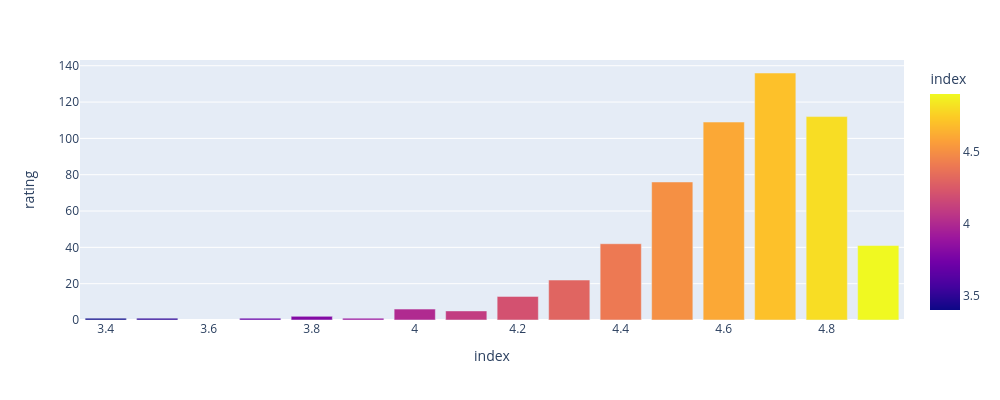

In [18]:
fig = px.bar(rate_df, x='index', y='rating',
              color='index',
             labels={'index'}, width = 1000, height=400)
fig.show(renderer = 'png')

- Best-selling Author

In [19]:
temp_df1 = df.groupby('author').count().reset_index().sort_values('title',ascending=False).head(10)

In [20]:
temp_df1

,author,title,types,price,review,year,rating
232,Rick Riordan,14,14,14,14,14,14
138,Jeff Kinney,13,13,13,13,13,13
277,Suzanne Collins,11,11,11,11,11,11
181,Malcolm Gladwell,8,8,8,8,8,8
271,Stephenie Meyer,8,8,8,8,8,8
150,John Grisham,6,6,6,6,6,6
117,Harper Lee,6,6,6,6,6,6
274,Stieg Larsson,6,6,6,6,6,6
215,Paulo Coelho,6,6,6,6,6,6
83,Don Miguel Ruiz,6,6,6,6,6,6


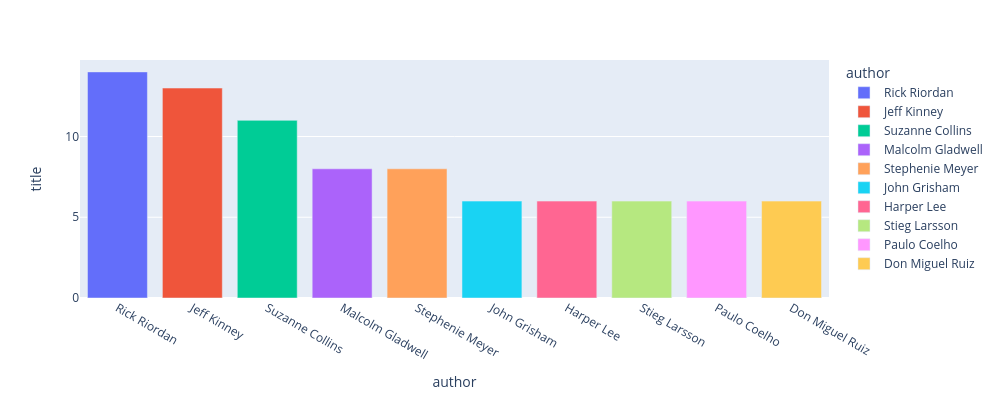

In [21]:
fig = px.bar(temp_df1, x=temp_df1['author'], y=temp_df1['title'],
              color='author',
             labels={'author'}, width = 1000, height=400)
fig.show(renderer = 'png')

- Top 10 Highest Price best Seller Authors

In [22]:
temp_df2 = df.groupby('author').mean().reset_index().sort_values('price',ascending=False).head(10)
temp_df2

/tmp/ipykernel_50687/2974332478.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,author,price,review,year,rating
292,Tony Hsieh,28.760000,95850.0,2011.000000,4.900000
131,Jamie Ford,23.200000,1251.0,2010.000000,4.700000
116,Guinness World Records,19.990000,887.0,2011.000000,4.500000
278,Suzanne Ryan,18.000000,24139.0,2018.000000,4.900000
142,Jennifer Smith,14.880000,25631.0,2019.000000,4.900000
220,R. J. Palacio,14.776667,34353.0,2014.666667,4.766667
139,Jen Fisch,13.265000,22874.0,2018.500000,4.850000
261,Simon Sinek,12.980000,68710.0,2017.000000,4.600000
195,Melissa Lagonegro,12.980000,1427.0,2014.000000,4.800000
113,Gillian Flynn,12.130000,9879.0,2013.000000,4.900000


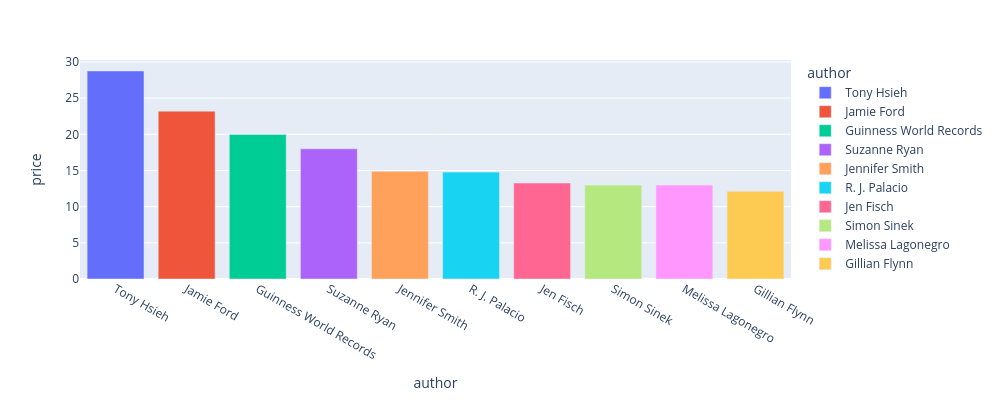

In [23]:
fig = px.bar(temp_df2, x=temp_df2['author'], y=temp_df2['price'],
              color='author',
             labels={'author'}, width = 1000, height=400)
fig.show(renderer = 'png')

- Relationship between the Rating, Reviews and Price 

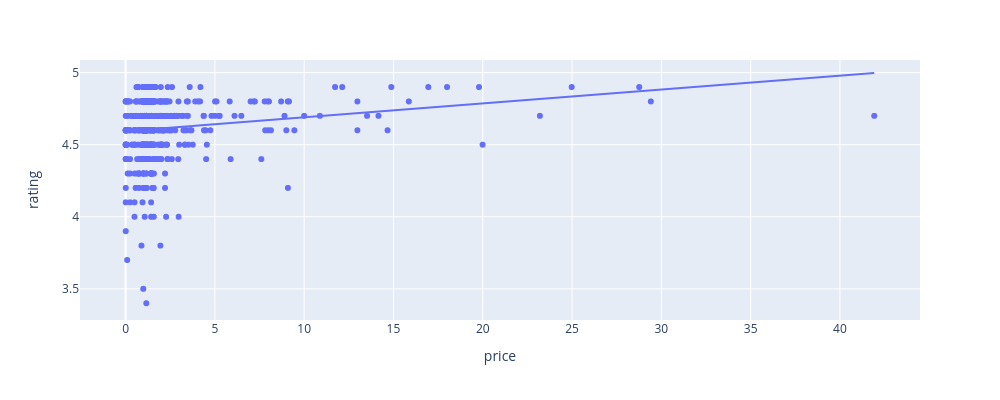

In [24]:
fig = px.scatter(df, x="price", y="rating", trendline="ols", width = 1000, height=400)
fig.show(renderer = 'png')

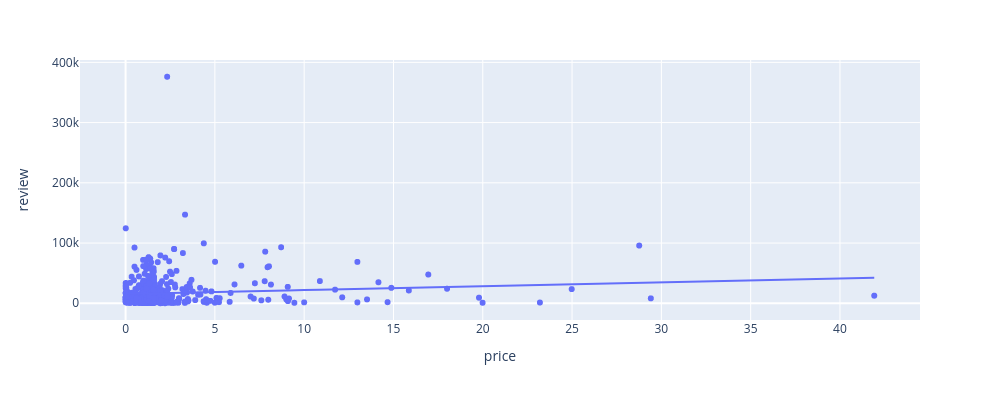

In [25]:
fig = px.scatter(df, x="price", y="review", trendline="ols", width = 1000, height=400)
fig.show(renderer = 'png')

In [26]:
df1 = df.groupby('author').mean().sort_values('review',ascending=False).reset_index().head(10)

/tmp/ipykernel_50687/2067356101.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- Average Rating and Reviews in relation to Authors

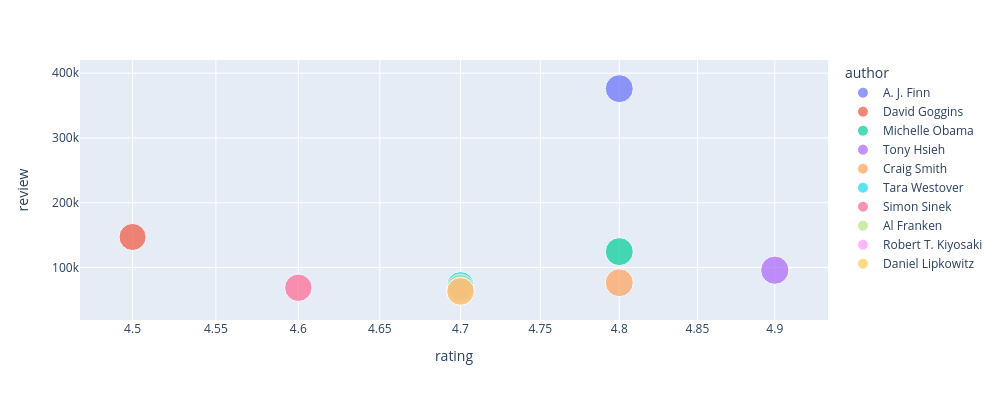

In [27]:
fig = px.scatter(df1, x="rating", y="review",
	             color="author", size = 'rating',
                 hover_name="author", log_x=True, width = 1000, height=400)
fig.show(renderer = 'png')

- Top 10 Highest Priced Bestseller Books

/tmp/ipykernel_50687/1209667830.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



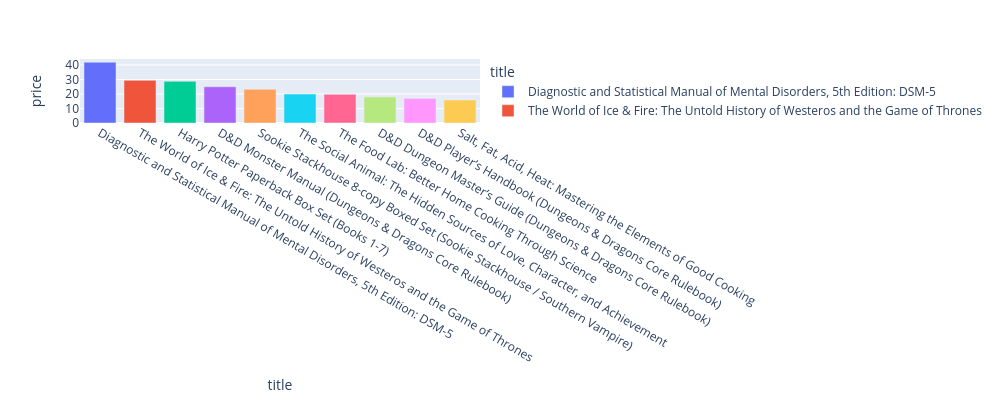

In [28]:
tipr = df.groupby('title').mean().reset_index().sort_values('price',ascending=False).head(10)
fig = px.bar(tipr, x=tipr['title'], y=tipr['price'],
              color='title',
             labels={'title'}, width = 1000, height=400)
fig.show(renderer = 'png');

- Top 10 Highly Rated Bestseller Books

/tmp/ipykernel_50687/2694612241.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



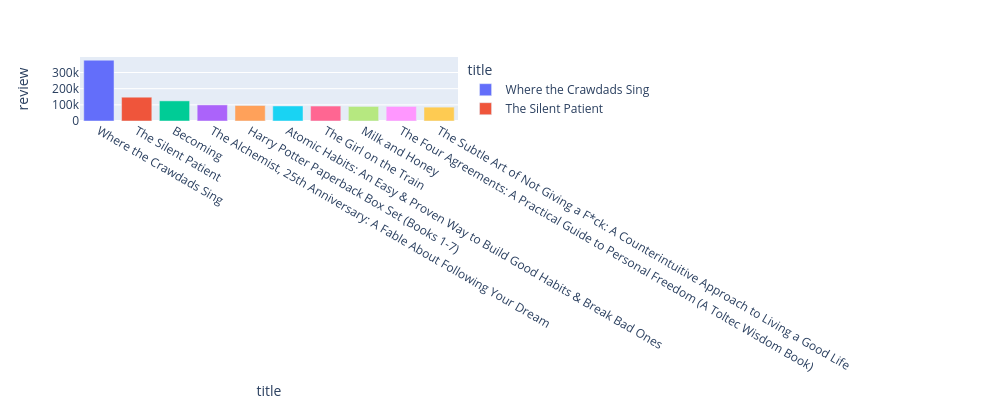

In [29]:
tir = df.groupby('title').mean().reset_index().sort_values('review',ascending=False).head(10)
fig = px.bar(tir, x=tir['title'], y=tir['review'],
              color='title',
             labels={'title'}, width = 1000, height=400)
fig.show(renderer = 'png')

- Yearly Average Trends of Best-selling Books

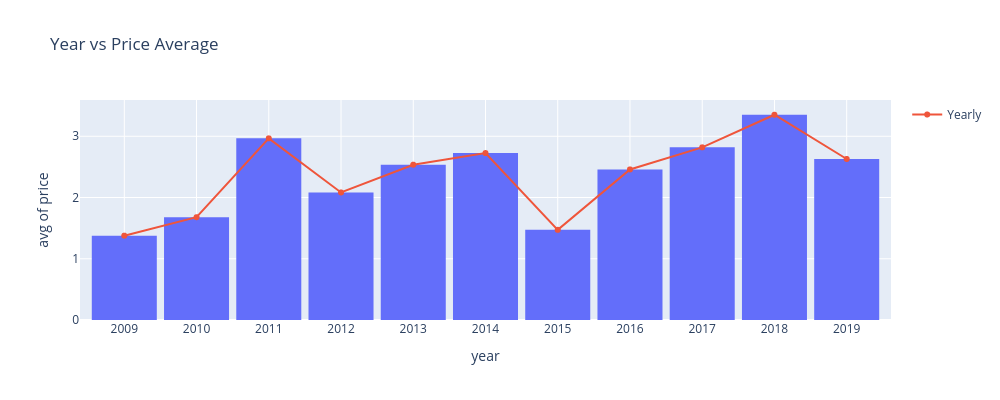

In [30]:
years_price = df.groupby(['year'], as_index=False)['price'].mean()
fig = px.histogram(years_price, x="year", y="price", histfunc="avg", title="Year vs Price Average", width = 1000, height=400)
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers+lines", x=years_price["year"], y=years_price["price"], xperiodalignment="start", name="Yearly"))
fig.show(renderer = 'png')
 


In [31]:
years_price.head()

,year,price
0,2009,1.377159
1,2010,1.678235
2,2011,2.966415
3,2012,2.082222
4,2013,2.535745


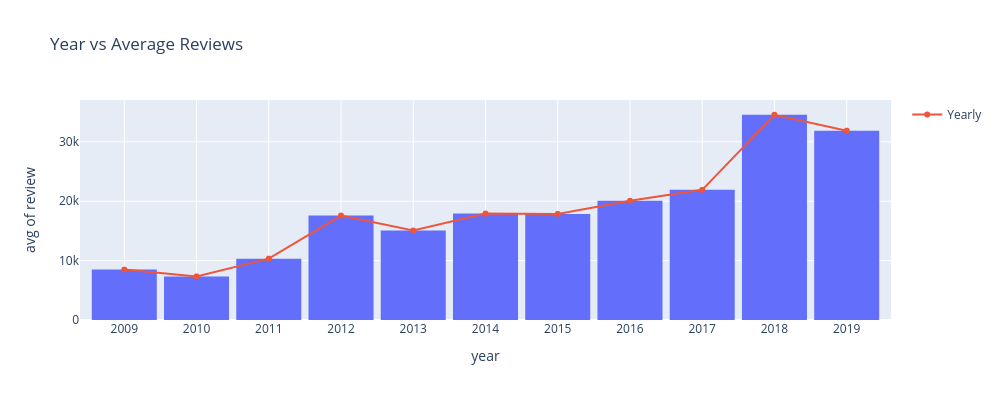

In [32]:
years_review = df.groupby(['year'], as_index=False)['review'].mean()
fig = px.histogram(years_review, x="year", y="review", histfunc="avg", title="Year vs Average Reviews", width = 1000, height=400)
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers+lines", x=years_review["year"], y=years_review["review"], xperiodalignment="start", name="Yearly"))
fig.show(renderer = 'png')

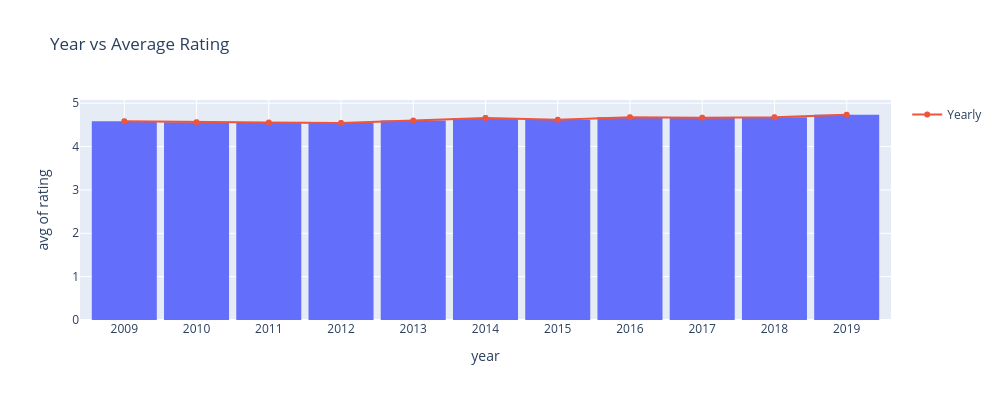

In [33]:
years_rating = df.groupby(['year'], as_index=False)['rating'].mean()
fig = px.histogram(years_rating, x="year", y="rating", histfunc="avg", title="Year vs Average Rating", width = 1000, height=400)
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers+lines", x=years_rating["year"], y=years_rating["rating"], xperiodalignment="start", name="Yearly"))
fig.show(renderer = 'png')